In [42]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

file = open('particle_trajectories', 'rb')
solutions = pickle.load(file)
file.close()

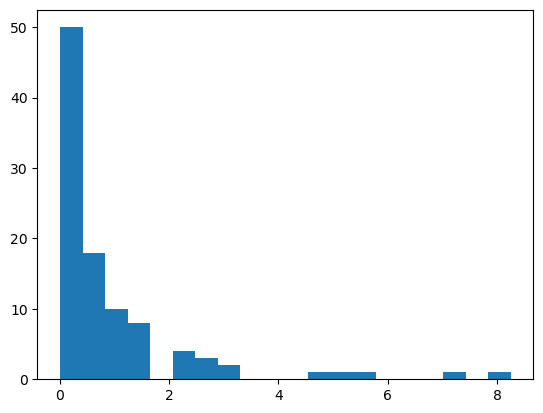

In [43]:
times = []
# Note that solutions are calculated from RK45, where time steps vary based 
# on trajectory. Each particle may have different no. of time steps.

squared_displacements = []

for sol in solutions:
    t = sol.t 
    x = sol.y[0]
    y = sol.y[1]
    
    initial_x = x[0]
    initial_y = y[0]
    
    final_x = x[-1]
    final_y = y[-1]
    
    squared_displacement = (final_x - initial_x)**2 + (final_y - initial_y)**2
    squared_displacements.append(squared_displacement)

MSD = sum(squared_displacements)/len(squared_displacements)
plt.hist(squared_displacements, bins = 20)
plt.show()

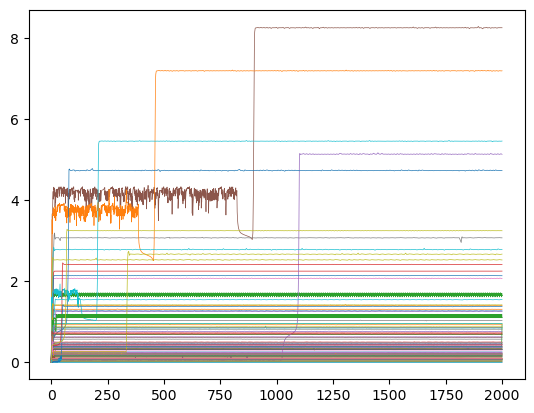

In [71]:
# Plots of the mean squared displacements for each particle as time evolves
displacements_wrt_t = []
for a, sol in enumerate(solutions):
    n = len(sol.t)
    x = sol.y[0]
    y = sol.y[1]
    initial_x = x[0]
    initial_y = y[0]
    particle_displacements = []
    for i in range(n): # Calculate squared displacement for a particle at each time point
        new_x = x[i]
        new_y = y[i]
        squared_displacement = (new_x - initial_x)**2 + (new_y - initial_y)**2
        particle_displacements.append(squared_displacement)
    displacements_wrt_t.append(particle_displacements)
    

import random
# Now displacements_wrt_t has displacements at each time for each particle.
for i, particle_displacements in enumerate(displacements_wrt_t):
    times = solutions[i].t
    plt.plot(times, particle_displacements, linewidth=0.5)

plt.show()

In [84]:
print(sol.t)

[0.00000000e+00 1.22980293e-01 7.00510420e-01 ... 1.99809948e+03
 1.99952384e+03 2.00000000e+03]


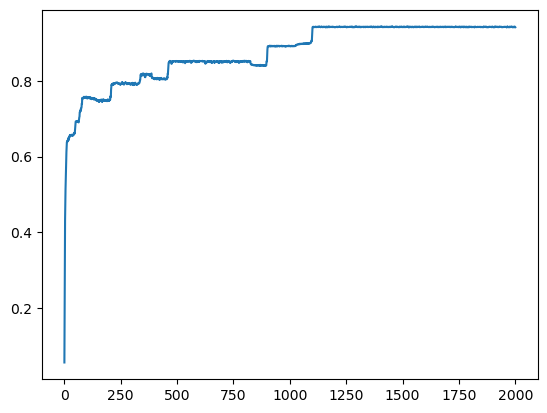

In [105]:
# We plot a graph of the mean squared displacements
# Suppose we have some time step t, we find the mean squared displacement of the particles
# at time steps less than or closest to t

import bisect
def find_closest_time(times, t):
    index = bisect.bisect_left(times, t)

    # Check if t is exactly in the times
    if index < len(times) and times[index] == t:
        closest_time = times[index]
    else:
        # t is not in the times array, so get the closest time before t
        closest_time = times[index - 1]
    
    return closest_time, index - 1


time_steps_list = range(1, 2001) # Taking values at every integer time, can adjust this.
MSD_list = []
particle_displacement_dist = []
for time in time_steps_list:
    particle_displacements = []
    for sol in solutions:
        t_list = sol.t
        x = sol.y[0]
        y = sol.y[1]
        initial_x = x[0]
        initial_y = y[0]
        
        closest_time, index = find_closest_time(t_list, time)
        new_x = x[index]
        new_y = y[index]
        squared_displacement = (new_x - initial_x)**2 + (new_y - initial_y)**2
        particle_displacements.append(squared_displacement)
    
    MSD = sum(particle_displacements)/len(particle_displacements)
    MSD_list.append(MSD)
    particle_displacement_dist.append(particle_displacements)

plt.plot(time_steps_list, MSD_list)
plt.show()